In [44]:
import numpy as np
import sympy as syp
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
def u_true(x, y, t, c):
    return np.sin(np.pi * x)[:, None] * np.sin(np.pi * y)[None, :] * np.cos(np.pi * np.sqrt(2) * c * t)

def solve_wave_eq(Nx, Ny, Lx, Ly, c, T, Dt):
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    Dx = x[1] - x[0]
    Dy = y[1] - y[0]
    Nt = int(T / Dt)
    
    u = np.sin(np.pi * x)[:, None] * np.sin(np.pi * y)[None, :]
    u_old = u.copy()
    u_new = np.zeros_like(u)

    snapshots = []
    times = []

    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            laplace = ((u[i+1, j] - 2*u[i, j] + u[i-1, j]) / Dx**2 +
                       (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / Dy**2)
            u_new[i, j] = u[i, j] + 0.5 * Dt**2 * c**2 * laplace

    snapshots.append(u.copy())
    times.append(0.0)

    for n in range(1, Nt):
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                laplace = ((u[i+1, j] - 2*u[i, j] + u[i-1, j]) / Dx**2 +
                           (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / Dy**2)
                u_new[i, j] = 2*u[i, j] - u_old[i, j] + Dt**2 * c**2 * laplace

        u_old[:], u[:] = u[:], u_new[:]
        if n == Nt - 1:
            snapshots.append(u.copy())
            times.append(n * Dt)

    return np.array(times), np.array(snapshots), x, y

In [ ]:
def generate_halving_list(base, n):
    return [base / (1.1 ** i) for i in range(n)]

def generate_doubling_list(base, n):
    return [int(base * (1.3 ** i)) for i in range(n)]


dt_list = generate_halving_list(0.003, 8)
res_list_x = generate_doubling_list(4, 6)
res_list_y = generate_doubling_list(4, 6)
c = 1.0
T = 0.5
Lx = 1.0
Ly = 1.0
print(dt_list)

fixed_res = (.005/16, 256, 256)

# Convergence in time
dt = fixed_res[0]
Ny = fixed_res[1]
Nx = fixed_res[2]
time_errors = []
for Dt in dt_list:
    print("Dt =",Dt)
    times, snapshots, x, y = solve_wave_eq(60, 60, Lx, Ly, c, T, Dt)
    u_num = snapshots[-1]
    u_exact = u_true(x, y, T, c)
    error = np.linalg.norm(u_num - u_exact)
    time_errors.append(error)


# Convergence in x-direction
Ny = fixed_res[1]
err_x = []
hs_x = []

for Nx in res_list_x:
    print("Nx =",Nx)
    times, snapshots, x, y = solve_wave_eq(Nx, Ny, Lx, Ly, c, T, dt)
    u_num = snapshots[-1]
    u_exact = u_true(x, y, T, c)
    error = np.linalg.norm(u_num - u_exact)
    err_x.append(error)
    hs_x.append(1.0 / Nx)

# Convergence in y-direction
Nx = fixed_res[2]
err_y = []
hs_y = []

for Ny in res_list_y:
    print("Ny =",Ny)
    times, snapshots, x, y = solve_wave_eq(Nx, Ny, Lx, Ly, c, T, dt)
    u_num = snapshots[-1]
    u_exact = u_true(x, y, T, c)
    error = np.linalg.norm(u_num - u_exact)
    err_y.append(error)
    hs_y.append(1.0 / Ny)
    

[0.003, 0.002727272727272727, 0.0024793388429752063, 0.0022539444027047328, 0.0020490403660952117, 0.001862763969177465, 0.0016934217901613316, 0.0015394743546921193]
Dt = 0.003
Dt = 0.002727272727272727
Dt = 0.0024793388429752063
Dt = 0.0022539444027047328
Dt = 0.0020490403660952117
Dt = 0.001862763969177465
Dt = 0.0016934217901613316
Dt = 0.0015394743546921193
Nx = 4
Nx = 5
Nx = 6
Nx = 8
Nx = 11
Nx = 14
Ny = 4
Ny = 5
Ny = 6
Ny = 8
Ny = 11
Ny = 14


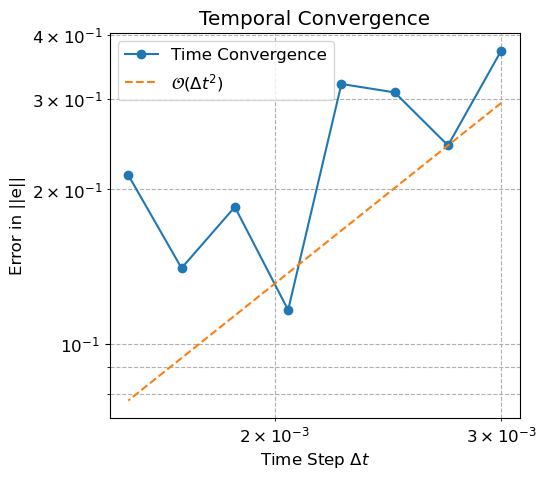

In [ ]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(18, 5))

# Subplot 1: Temporal Convergence
plt.subplot(1, 3, 1)
plt.loglog(dt_list, time_errors, 'o-', label='Time Convergence')
ref_t = (np.array(dt_list) / dt_list[1])**2 * time_errors[1]
plt.loglog(dt_list, ref_t, '--', label=r'$\mathcal{O}(\Delta t^2)$')
plt.xlabel(r'Time Step $\Delta t$')
plt.ylabel('Error in ||e||')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.title('Temporal Convergence')

import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator




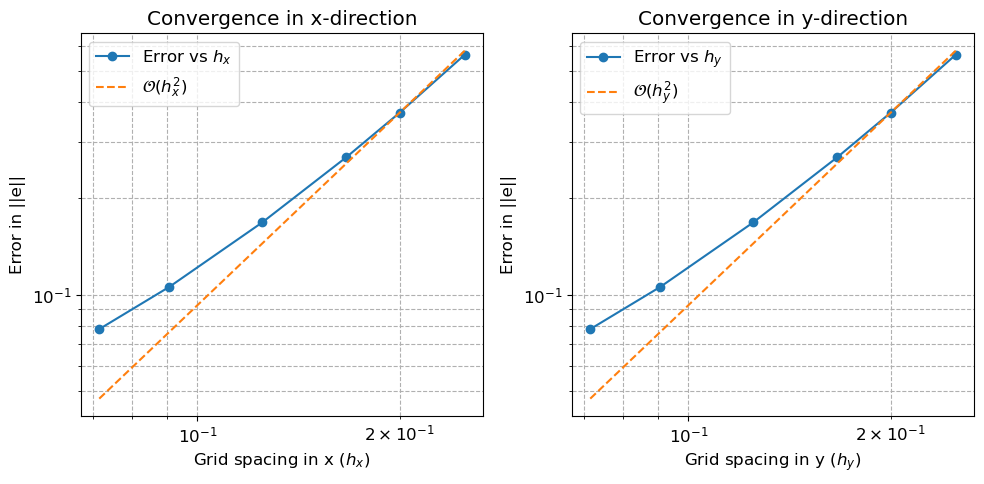

In [ ]:
plt.figure(figsize=(10, 5))
# Subplot 2: Spatial Convergence in x
plt.subplot(1, 2, 1)
plt.loglog(hs_x, err_x, 'o-', label='Error vs $h_x$')
ref_x = (np.array(hs_x) / hs_x[1])**2 * err_x[1]
plt.loglog(hs_x, ref_x, '--', label=r'$\mathcal{O}(h_x^2)$')
plt.xlabel('Grid spacing in x ($h_x$)')
plt.ylabel('Error in ||e||')
plt.title('Convergence in x-direction')
plt.grid(True, which='both', ls='--')
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0, numticks=4))
plt.legend()

# Subplot 3: Spatial Convergence in y
plt.subplot(1, 2, 2)
plt.loglog(hs_y, err_y, 'o-', label='Error vs $h_y$')
ref_y = (np.array(hs_y) / hs_y[1])**2 * err_y[1]
plt.loglog(hs_y, ref_y, '--', label=r'$\mathcal{O}(h_y^2)$')
plt.xlabel('Grid spacing in y ($h_y$)')
plt.ylabel('Error in ||e||')
plt.title('Convergence in y-direction')
plt.grid(True, which='both', ls='--')
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0, numticks=4))
plt.legend()

plt.tight_layout()
plt.show()


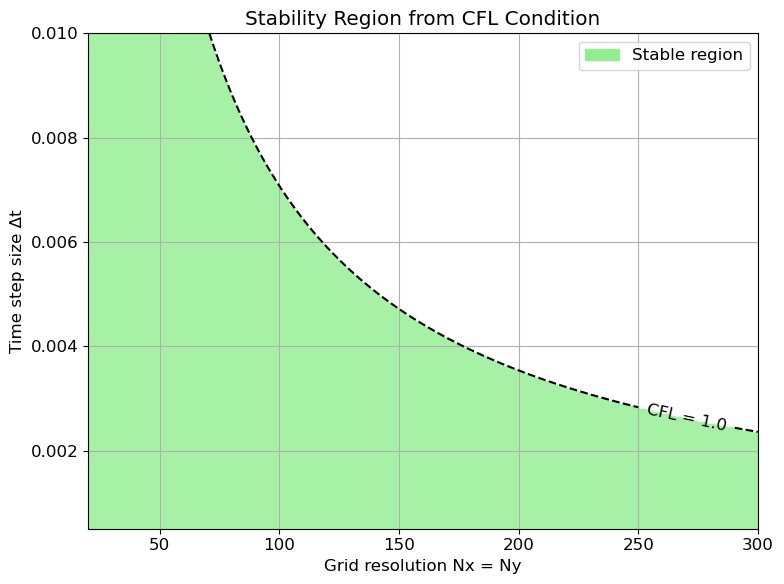

In [ ]:
Nx_vals = np.linspace(20, 300, 300)
dt_vals = np.linspace(0.0005, 0.01, 300)
 
L = 1.0
Nx_grid, dt_grid = np.meshgrid(Nx_vals, dt_vals)
dx = L / Nx_grid
dy = dx

# CFL condition
CFL_max_dt = 1.0 / c / np.sqrt(1.0 / dx**2 + 1.0 / dy**2)

stable = dt_grid >= CFL_max_dt

plt.figure(figsize=(8, 6))
plt.contourf(Nx_grid, dt_grid, stable, levels=1, colors=['lightgreen', 'white'], alpha=0.8)
contour = plt.contour(Nx_grid, dt_grid, dt_grid / CFL_max_dt, levels=[1.0], colors='k', linestyles='--')
plt.clabel(contour, fmt='CFL = 1.0', colors='k')

plt.title('Stability Region from CFL Condition')
plt.xlabel('Grid resolution Nx = Ny')
plt.ylabel('Time step size Δt')
plt.grid(True)
plt.legend([plt.Rectangle((0,0),1,1,color='lightgreen')], ['Stable region'])
plt.tight_layout()
plt.show()
